In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy import stats

import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns

from tqdm import tqdm

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import yfinance as yf
yf.pdr_override()

In [2]:
assets = ['AAPL', 'AMZN']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, start = '2000-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
pf_data.head()

,AAPL,AMZN
Date,,
2000-01-03 00:00:00-05:00,0.850643,4.468750
2000-01-04 00:00:00-05:00,0.778926,4.096875
2000-01-05 00:00:00-05:00,0.790324,3.487500
2000-01-06 00:00:00-05:00,0.721931,3.278125
2000-01-07 00:00:00-05:00,0.756128,3.478125


Text(0, 0.5, 'Stock Price')

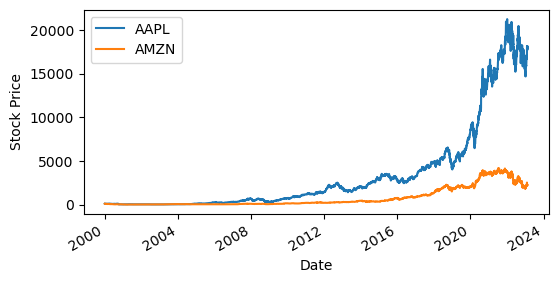

In [4]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(6, 3))
plt.ylabel('Stock Price')

In [5]:
log_returns = np.log(pf_data/pf_data.shift(1))

<AxesSubplot:>

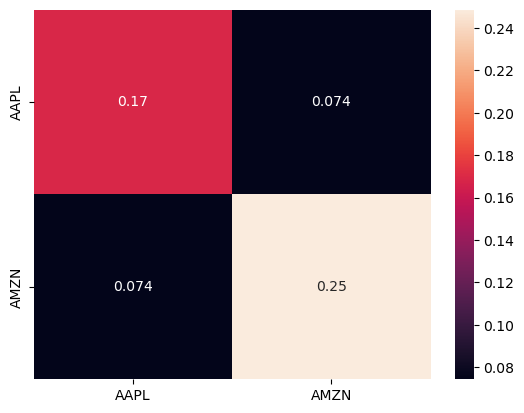

In [6]:
sns.heatmap(log_returns.cov()*250, annot=True)

<AxesSubplot:>

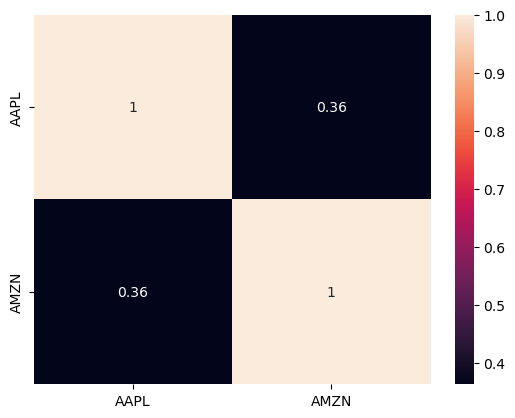

In [7]:
sns.heatmap(log_returns.corr(), annot=True)

In [8]:
num_assets = len(assets)

In [9]:
arr = np.random.random(num_assets)

In [10]:
weights = np.random.random(num_assets)
weights /=np.sum(weights)

In [11]:
#Expected Portfolio Return:
print(str(round(np.sum(weights*log_returns.mean())*250*100,2))+"%")

15.93%


In [12]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(100000):
    weights = np.random.random(num_assets)
    weights/=np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [13]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [ ]:
X = portfolios.iloc[:, 1]
y = portfolios.iloc[:, 0]


mean_variance_pairs = np.array(portfolios)

risk_free_rate=0 #-- Include risk free rate here

fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolios.iloc[:,1]**0.5, y=portfolios.iloc[:, 0], 
                      marker=dict(color=(portfolios.iloc[:,0]-risk_free_rate)/(portfolios.iloc[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe Ratio")
                                 ), 
                      mode='markers'))
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Sample of Random Portfolios',
                  width=850,
                  height=500)
fig.update_xaxes(range=[0.01, 0.01])
fig.update_yaxes(range=[0.01,0.01])
fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))


